 # Predictor importance using Permutation methods
    
    Based off of a neural net predictor for diabetes progression, which is a built in example data
    set

    See

    https://scikit-learn.org/stable/datasets/toy_dataset.html
    
    The eli5 package makes global estimates of predictor importance and interaction
    
    Eli 5 can be a bit hard to install, the command is
    
        conda install -c conda-forge eli5

In [2]:
#install eli5 when running in google colab

!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=895b4daf156429963fd492f17b79ab5092305f3350663eb4fbd6a974587662e5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
# Loading data, dividing, modeling and EDA below

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import time
import pandas as pd
import matplotlib
import eli5
from eli5.sklearn import PermutationImportance


X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

In [4]:
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
X?

Looking at the sklearn manual at

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Column 11 is a quantitative measure of disease progression one year after baseline- it is a float

Here are the predictors, all of which are floats

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

Below I used X? to find out a bit about X, it is an ndarray, with 442 elements

Here we convert the input data,  which were numpy matrices to pandas dataframes

sklearn accepts either, but some of the permuation plot material does not

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X,columns=features), y, test_size=0.33, random_state=42)

This is a pipelined model,  more on that later

The scaler and the model are combined into a single operation

We are modifying the data by standard scaling it,  sometimes also called z scaling

    Scaled data   =  (original data-mean)/(standard deviation of original data)
    
The correlation structure and predictive power of the variables is not changed, but all the scaled variables now have a mean value of zero and a standard deviation of 1

It is typically easier to train neural networks on scaled data

A pipeline is combination of data transformations, where the data is passed to each operation in turn,  so we can combine data formatting, scaled and then creation of a model all into one operation.

In [7]:
model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(5,3,),activation='logistic', max_iter=50000,learning_rate='invscaling',random_state=0)
)

# Question

What type of predictive model is being used here?   What are it's characteristics?

What type of data is being predicted in the label or target variable y?

How is this different from most of our earlier models?

What loss function is in use

Look up MLPRegressor (figure out what library it is in, then google it).

What operational parameters can you change?   Try one

Fit the model

In [8]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3),
                              learning_rate='invscaling', max_iter=50000,
                              random_state=0))])

Now we will compute the impact of the different features by permutation,  randomizing one factor at a time and studying the impact of each on the prediction

We can then get an output table,  the weight

In [9]:
perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)

Now we can use eli5 to show the permutation weights

In [10]:
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.5144 ± 0.1036,bmi
0.3470 ± 0.0441,s5
0.2794 ± 0.0424,s3
0.2725 ± 0.0945,bp
0.1923 ± 0.0578,s4
0.1879 ± 0.0298,s2
0.1734 ± 0.0683,sex
0.1728 ± 0.0531,age
0.1602 ± 0.0456,s1
0.1536 ± 0.0651,s6


# Question:
    
Look up in Eli5 how the weights are determined, and explain it here



#Partial Dependence Plots

In [30]:
# just checking the feature order
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

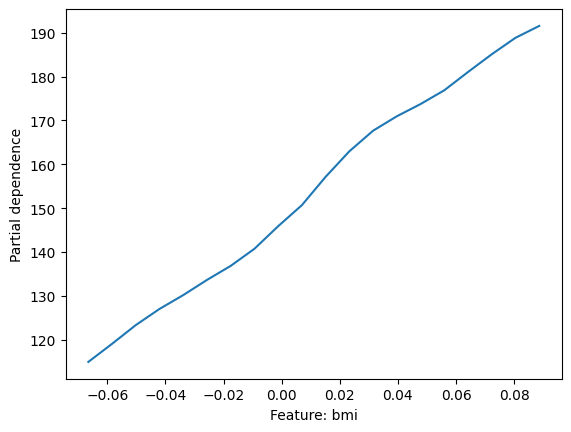

In [67]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

#bmi was the most important

target=2
nsteps=20

dpfeatures=[(target,)]



# we already have the list of feature names in a variable called features

#dpfeature_names= features

#dpfeature_names=[f"Features #{i}" for i in range(X_train.shape[1])]

dpfeature_names=[f"Feature: {i }" for i in features]

deciles = {0: np.linspace(X_train.iloc[target].min(),X_train.iloc[target].max() , num=nsteps)}


pd_results=partial_dependence(model,X_train,features=dpfeatures,kind='average',grid_resolution=nsteps)


display=PartialDependenceDisplay([pd_results],features=dpfeatures,feature_names=dpfeature_names,deciles=deciles,target_idx=0)

display.plot()



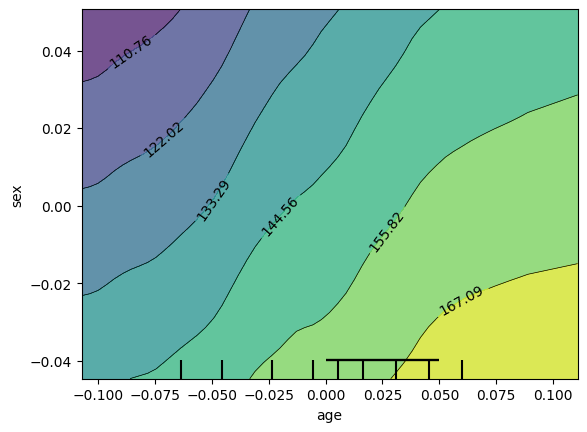

In [60]:
PartialDependenceDisplay.from_estimator(model,X_train,[(0,1)])

Alter the dual dependence plot above to show the two most important variables in the model as determined by your ELI5 results